# Teachbooks features in this book

## Reveal.JS slides


<div>
<iframe src="https://slides.com/nareshkumardevulapally/introduction/embed" width="100%" height="500" title="Test Title" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
</div>
<!-- 
<div>
<iframe src="/slides/slides_slides-ai/index.html" width="100%" height="500" title="Test Title" scrolling="no" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>
</div> -->

### Why I Use Reveal.js for Slides

- **Web-Hosted & Accessible** – Students can view slides online without downloading files.
- **Interactive & Engaging** – Built-in animations and transitions enhance presentation flow.
- **Customizable & Flexible** – Supports Markdown, HTML, and JavaScript for tailored content.
- **Mobile & Cross-Platform** – Works on any device with a web browser.
- **Live Code & Plugins** – Supports code execution, speaker notes, and powerful plugins.
- **Version Control Friendly** – Easily track changes using Git.

Reveal.js makes presentations dynamic, shareable, and tech-friendly!

In [18]:
import micropip
await micropip.install(["ipympl", 'plotly', 'scipy', 'jupyterquiz', 'jupytercards' ])

# Interactive Matplotlib plots with ipywidgets integration

In [19]:
# Hidden Code - Backend Processing Logic

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.ndimage import convolve
from skimage import data
from IPython.display import display

# Load a built-in grayscale image from skimage
original_image = data.camera()
image = np.array(original_image)

# Define filter functions
def apply_original(img):
    return img

# UI Widgets
filter_dropdown = widgets.Dropdown(
    options=["Original", "Inverted", "Threshold", "Blur", "Edge Detection"],
    value="Edge Detection",
    description="Filter:"
)

blur_slider = widgets.IntSlider(
    min=1, max=15, step=2, value=3
)

blur_label = widgets.Label(value=r"Blur Strength (Sigma):")
blur_box = widgets.VBox([blur_label, blur_slider])
blur_box.layout.display = 'none'

def update_visibility(change):
    blur_box.layout.display = 'block' if change['new'] == "Blur" else 'none'

filter_dropdown.observe(update_visibility, names='value')

ui = widgets.VBox([filter_dropdown, blur_box])

# User-Accessible Code - Functions for Applying Filters and Running UI

def process_image(filter_type, blur_strength=3):
    """Processes the image based on selected filter type."""
    if filter_type == "Original":
        processed_img = apply_original(image)
    elif filter_type == "Inverted":
        processed_img = apply_inverted(image)
    elif filter_type == "Threshold":
        processed_img = apply_threshold(image)
    elif filter_type == "Blur":
        processed_img = apply_blur(image, blur_strength)
    elif filter_type == "Edge Detection":
        processed_img = apply_edge_detection(image)

    # Display original and processed images
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(image, cmap='gray')
    axes[0].axis('off')
    axes[0].set_title("Original Image")
    
    axes[1].imshow(processed_img, cmap='gray')
    axes[1].axis('off')
    axes[1].set_title(filter_type)
    
    plt.show()

def display_plot():
    # Ignore part below this code
    output = widgets.interactive_output(process_image, {
        'filter_type': filter_dropdown,
        'blur_strength': blur_slider
    })
    
    display(ui, output)

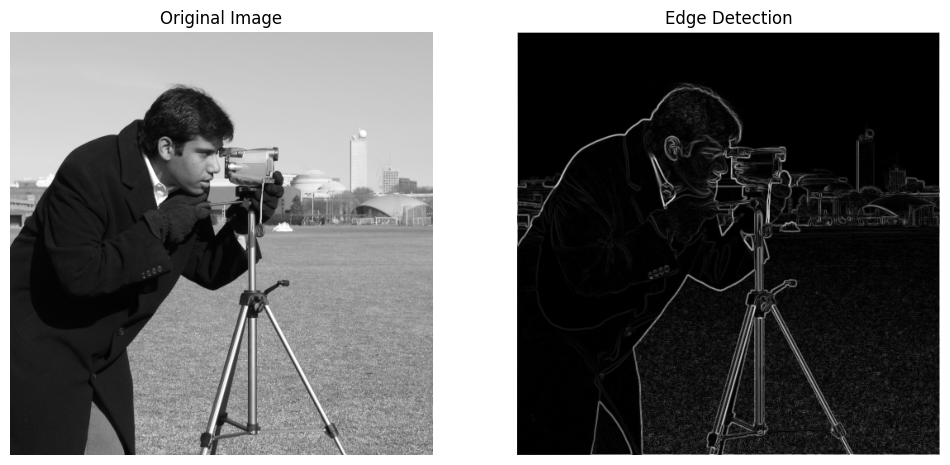

Output()

In [20]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy.ndimage import convolve
from skimage import data
from IPython.display import display

# Try playing with different image processing implementations
def apply_inverted(img):
    return 255 - img

def apply_threshold(img):
    return (img > 127) * 255  # Binary thresholding

def apply_blur(img, kernel_size=3):
    if kernel_size < 1:
        return img
    kernel = np.ones((kernel_size, kernel_size)) / (kernel_size * kernel_size)
    return convolve(img, kernel, mode='constant', cval=0)

def apply_edge_detection(img):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    edge_x = convolve(img.astype(float), sobel_x, mode='constant', cval=0)
    edge_y = convolve(img.astype(float), sobel_y, mode='constant', cval=0)
    processed_img = np.sqrt(edge_x**2 + edge_y**2)
    return (processed_img / processed_img.max()) * 255  # Normalize
    
# Removing below code will not render the plot
display_plot()

# Interactive JupyterQuiz integration

In [21]:
from jupyterquiz import display_quiz

github = 'https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'

file = '03-first-data/questions/4-summary-stats.json'

display_quiz(github+file, colors='fdsp')

<IPython.core.display.Javascript object>

# Plotly integration

In [22]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

# Jupytercards integration for flashcards

In [23]:
from jupytercards import display_flashcards

file = '03-first-data/flashcards/hypothesis-testing.json'
github = 'https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
display_flashcards(github+file)

<IPython.core.display.Javascript object>

# Testing interactive plots with plotly

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import numpy as np
import cv2
import requests

# Set default renderer to ensure proper display
pio.renderers.default = "iframe"

# Download the image from the URL
image_url = "https://images.plot.ly/language-icons/api-home/python-logo.png"
response = requests.get(image_url)
image_bytes = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)

# Resize for better visualization
img = cv2.resize(img, (400, 400))

# Define image processing techniques
def process_image(img, method):
    if method == "None":
        return img
    elif method == "Grayscale":
        return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif method == "Edge Detection (Canny)":
        return cv2.Canny(img, 100, 200)
    elif method == "Gaussian Blur":
        return cv2.GaussianBlur(img, (5, 5), 0)
    elif method == "Thresholding":
        return cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)[1]
    return img

# Create processed images for each method
methods = ["None", "Grayscale", "Edge Detection (Canny)", "Gaussian Blur", "Thresholding"]
images = {method: process_image(img, method) for method in methods}

# Convert images to RGB (for Plotly display)
def convert_to_rgb(image):
    if len(image.shape) == 2:  # Grayscale images
        return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

images_rgb = {method: convert_to_rgb(images[method]) for method in methods}

# Create the subplot layout for input and output images
fig = make_subplots(
    rows=1, cols=2, 
    subplot_titles=("Original Image", "Processed Image"),
    horizontal_spacing=0.1  # Add spacing between images
)

# Add the original image on the left
fig.add_trace(go.Image(z=images_rgb["None"]), row=1, col=1)

# Add the initial processed image on the right (Default: None)
fig.add_trace(go.Image(z=images_rgb["None"]), row=1, col=2)

# Add frames for animation (switching techniques)
frames = [
    go.Frame(
        data=[
            go.Image(z=images_rgb["None"]),  # Original image remains unchanged
            go.Image(z=images_rgb[method])  # Processed image updates
        ],
        name=method
    )
    for method in methods
]

fig.update(frames=frames)

# Add an interactive dropdown menu with proper spacing
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {"label": method, "method": "animate", "args": [[method], {"mode": "immediate", "frame": {"duration": 0, "redraw": True}}]}
                for method in methods
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "xanchor": "center",
            "y": 1.2,  # Push dropdown down a bit
            "yanchor": "top"
        }
    ],
    title="Interactive Image Processing (Plotly) ",
    width=600,
    height=500,
    margin=dict(t=100, l=50, r=50, b=50),  # Add margins for better spacing
    annotations=[
        dict(x=0.22, y=1.05, text="Original Image", showarrow=False, font=dict(size=16), xanchor="center"),
        dict(x=0.77, y=1.05, text="Processed Image", showarrow=False, font=dict(size=16), xanchor="center")
    ]
)

# Show the interactive figure
fig.show()